### retrieving the data and saving them as CSV file 

In [137]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import emoji



# Read the text file into a DataFrame
df_demo = pd.read_csv('../Data/Raw data/df_final_demo (1).txt', delimiter=',', header=0)
df_web_data1 = pd.read_csv('../Data/Raw data/df_final_web_data_pt_1.txt', delimiter=',', header=0)
df_web_data2 = pd.read_csv('../Data/Raw data/df_final_web_data_pt_2.txt', delimiter=',', header=0)
df_experiment_clients = pd.read_csv('../Data/Raw data/df_final_experiment_clients.txt', delimiter=',', header=0)




#### 1- Load and Inspect Data

In [138]:
# Display the first few rows of each dataframe to understand their structure
df_demo



,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [139]:
df_web_data1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [140]:
df_web_data2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [141]:
df_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


### 2- Data Cleaning

In [142]:
# Merging web data1 and webdata2 
df_web_data = pd.concat([df_web_data1, df_web_data2], ignore_index=True)
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [143]:
# Checking for missing values and data types in the 3 datasets
missing_values_demo = df_demo.isnull().sum()
data_types_demo = df_demo.dtypes

missing_values_web = df_web_data.isnull().sum()
data_types_web = df_web_data.dtypes

missing_values_experiment = df_experiment_clients.isnull().sum()
data_types_experiment = df_experiment_clients.dtypes

missing_values_demo, data_types_demo, missing_values_web, data_types_web, missing_values_experiment, data_types_experiment


(client_id            0
 clnt_tenure_yr      14
 clnt_tenure_mnth    14
 clnt_age            15
 gendr               14
 num_accts           14
 bal                 14
 calls_6_mnth        14
 logons_6_mnth       14
 dtype: int64,
 client_id             int64
 clnt_tenure_yr      float64
 clnt_tenure_mnth    float64
 clnt_age            float64
 gendr                object
 num_accts           float64
 bal                 float64
 calls_6_mnth        float64
 logons_6_mnth       float64
 dtype: object,
 client_id       0
 visitor_id      0
 visit_id        0
 process_step    0
 date_time       0
 dtype: int64,
 client_id        int64
 visitor_id      object
 visit_id        object
 process_step    object
 date_time       object
 dtype: object,
 client_id        0
 Variation    20109
 dtype: int64,
 client_id     int64
 Variation    object
 dtype: object)

In [144]:
# Drop rows with missing values in Client demographical Profiles
df_demo_cleaned = df_demo.dropna()

# Drop rows with missing Variation in Experiment Roster
df_experiment_clients_cleaned = df_experiment_clients.dropna(subset=['Variation'])

# Convert date_time to datetime format in Web Data
df_web_data['date_time'] = pd.to_datetime(df_web_data['date_time'])

# Verify the cleaning process
missing_values_demo_cleaned = df_demo_cleaned.isnull().sum()
missing_values_experiment_cleaned = df_experiment_clients_cleaned.isnull().sum()
data_types_web_cleaned = df_web_data.dtypes

missing_values_demo_cleaned, missing_values_experiment_cleaned, data_types_web_cleaned

(client_id           0
 clnt_tenure_yr      0
 clnt_tenure_mnth    0
 clnt_age            0
 gendr               0
 num_accts           0
 bal                 0
 calls_6_mnth        0
 logons_6_mnth       0
 dtype: int64,
 client_id    0
 Variation    0
 dtype: int64,
 client_id                int64
 visitor_id              object
 visit_id                object
 process_step            object
 date_time       datetime64[ns]
 dtype: object)

#### Demographic Analysis
Merging Datasets

In [145]:
# merging the client demo and the experiment client data
df_merged = pd.merge(df_demo_cleaned, df_experiment_clients_cleaned, on = 'client_id')
df_merged


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50482,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50483,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50484,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50485,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [146]:

# Numerical columns 
# Primary clients demographics
primary_clients_demo = df_merged.describe()

primary_clients_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,5.048700e+04,50487.000000,50487.000000,50487.000000,50487.000000,5.048700e+04,50487.000000,50487.000000
mean,5.006180e+06,12.031810,150.416365,47.319795,2.254580,1.495168e+05,3.093272,6.131856
std,2.877445e+06,6.860326,81.945403,15.518616,0.533675,3.020390e+05,2.188009,2.175441
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.515688e+06,6.000000,82.000000,33.500000,2.000000,3.987718e+04,1.000000,4.000000
50%,5.025043e+06,11.000000,136.000000,48.000000,2.000000,6.573433e+04,3.000000,6.000000
75%,7.477922e+06,16.000000,192.000000,59.500000,2.000000,1.399583e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


##### exploring the numerical columns 

 ##### Univariate Analysis
**Distribution of Age**

**Distribution of Tenure**

**Distribution of Balance**

**Distribution of Logins in the last 6 months**

**Distribution of Calls in the last 6 months**

In [147]:
# Age distribution
age_distribution = df_merged['clnt_age'].describe()
age_distribution


count    50487.000000
mean        47.319795
std         15.518616
min         17.000000
25%         33.500000
50%         48.000000
75%         59.500000
max         96.000000
Name: clnt_age, dtype: float64

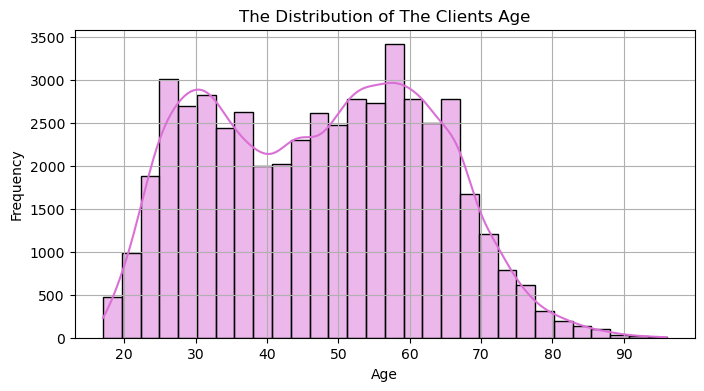

In [148]:
# Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['clnt_age'],color='orchid', bins=30, kde=True)
plt.title('The Distribution of The Clients Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

recommendations: who are our tipical clinets 
Age_rang
compare this to the test grounp

In [149]:
# Tenure distribution
tenure_distribution = df_merged['clnt_tenure_yr'].describe()
tenure_distribution

count    50487.000000
mean        12.031810
std          6.860326
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         55.000000
Name: clnt_tenure_yr, dtype: float64

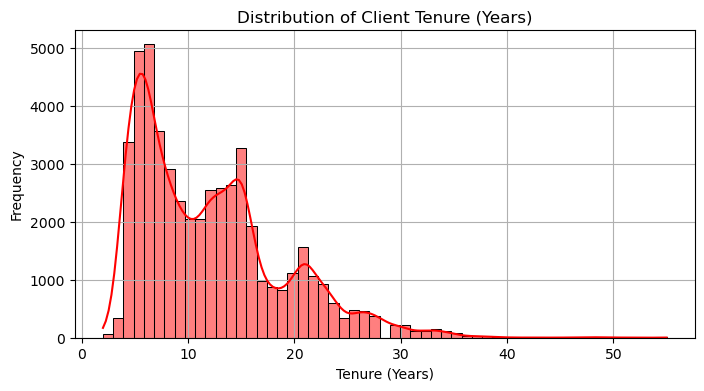

In [150]:
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['clnt_tenure_yr'],color='red', bins=55,kde=True )
plt.title('Distribution of Client Tenure (Years)')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [151]:
# Balance distribution
balance_distribution = df_merged['bal'].describe()
balance_distribution

count    5.048700e+04
mean     1.495168e+05
std      3.020390e+05
min      2.378944e+04
25%      3.987718e+04
50%      6.573433e+04
75%      1.399583e+05
max      1.632004e+07
Name: bal, dtype: float64

change from sceintific numbers to actual numbers 

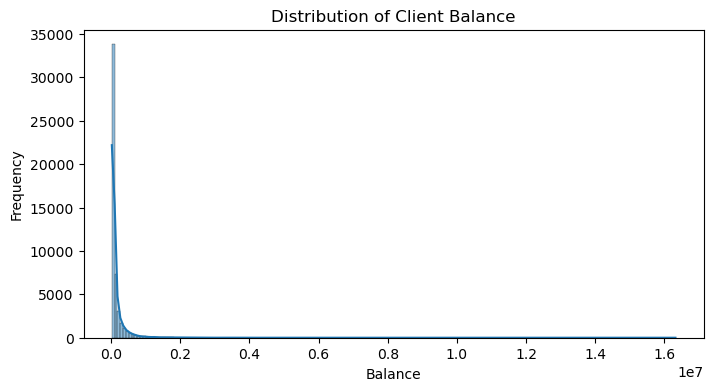

In [152]:

plt.figure(figsize=(8, 4))
sns.histplot(df_merged['bal'], bins=200, kde=True)
plt.title('Distribution of Client Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [153]:
 #Logons distribution

logons_distribution = df_merged['logons_6_mnth'].describe()
logons_distribution

count    50487.000000
mean         6.131856
std          2.175441
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          9.000000
Name: logons_6_mnth, dtype: float64

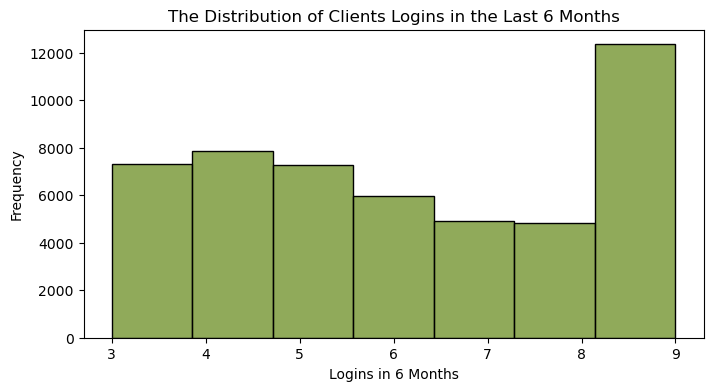

In [154]:
# Distribution of Logins in the last 6 months
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['logons_6_mnth'],color='olivedrab', bins=7)
plt.title('The Distribution of Clients Logins in the Last 6 Months')
plt.xlabel('Logins in 6 Months')
plt.ylabel('Frequency')
plt.show()

In [155]:
calls_distribution = df_merged['calls_6_mnth'].describe()
calls_distribution

count    50487.000000
mean         3.093272
std          2.188009
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: calls_6_mnth, dtype: float64

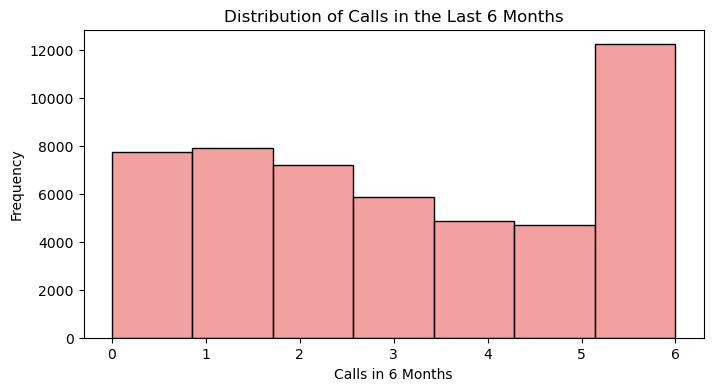

In [156]:
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['calls_6_mnth'],color='lightcoral', bins=7)
plt.title('Distribution of Calls in the Last 6 Months')
plt.xlabel('Calls in 6 Months')
plt.ylabel('Frequency')
plt.show()

### Bivariate Analysis


**Age vs. Logins**

**Age vs. Balance**

**Tenure vs. Balance**

**Number of Accounts vs. Balance**

**Gender vs. Balance**

In [157]:
# Correlation between age and logins
age_logons_corr = df_merged[['clnt_age', 'logons_6_mnth']].corr().iloc[0, 1]
# Correlation between number of accounts and balance
accts_balance_corr = df_merged[['num_accts', 'bal']].corr().iloc[0, 1]

age_logons_corr, accts_balance_corr


(0.0566399759263761, 0.265913106895121)

**Correlation between age and logins**:0.0566399759263761

**Interpretation**: This is a very weak positive correlation between age and the number of logins in the last 6 months. It means that as age increases, the number of logins slightly increases, but the relationship is very weak and almost negligible.

**Correlation between number of accounts and balance**: 0.265913106895121

**Interpretation**: This is a weak positive correlation between the number of accounts and the balance. It means that clients with more accounts tend to have a higher balance, but the relationship is not very strong.

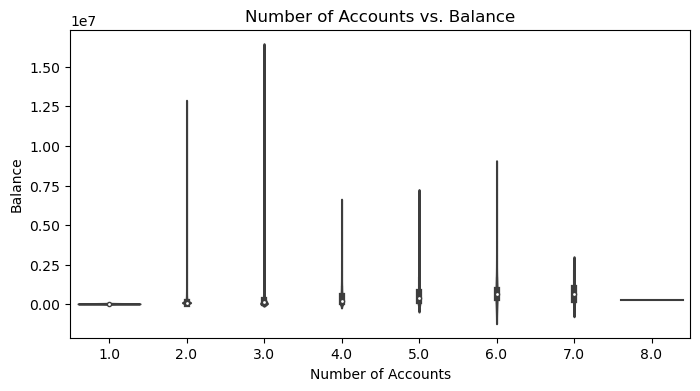

In [158]:
# Violin plot: Number of Accounts vs. Balance
plt.figure(figsize=(8, 4))
sns.violinplot(x='num_accts', y='bal', data=df_demo_cleaned)
plt.title('Number of Accounts vs. Balance')
plt.xlabel('Number of Accounts')
plt.ylabel('Balance')
plt.show()

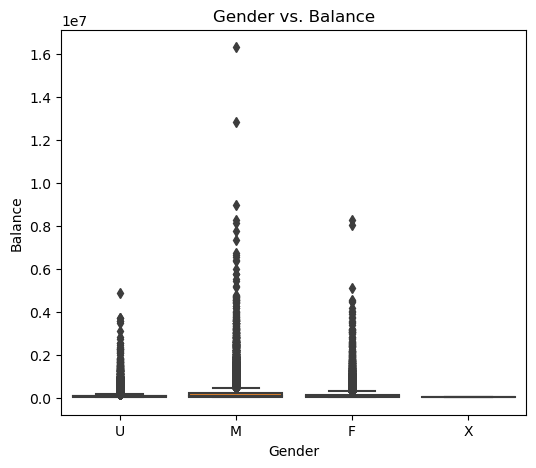

In [159]:
# Box plot: Gender vs. Balance
plt.figure(figsize=(6, 5))
sns.boxplot(x='gendr', y='bal', data=df_demo_cleaned)
plt.title('Gender vs. Balance')
plt.xlabel('Gender')
plt.ylabel('Balance')
plt.show()

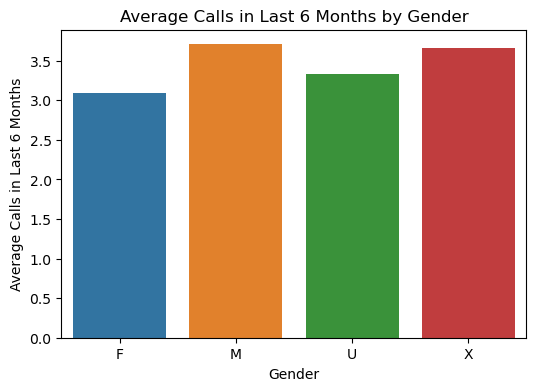

In [160]:
# Bar plot: Gender vs. Calls in Last 6 Months
gender_calls_avg = df_demo_cleaned.groupby('gendr')['calls_6_mnth'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='gendr', y='calls_6_mnth', data=gender_calls_avg)
plt.title('Average Calls in Last 6 Months by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Calls in Last 6 Months')
plt.show()

### merging the Demo with the Web data 

In [161]:
# Merge df_merged with df_web_data
df= pd.merge(df_merged, df_web_data, on='client_id')
df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


In [162]:
# Standardizing the columns names 
rename_dict = {
    'client_id': 'client_id',
    'clnt_tenure_yr': 'client_tenure_years',
    'clnt_tenure_mnth': 'client_tenure_months',
    'clnt_age': 'client_age',
    'gendr': 'gender',
    'num_accts': 'number_of_accounts',
    'bal': 'balance',
    'calls_6_mnth': 'calls_last_6_months',
    'logons_6_mnth': 'logins_last_6_months',
    'Variation': 'variation',
    'visitor_id': 'visitor_id',
    'visit_id': 'visit_id',
    'process_step': 'process_step',
    'date_time': 'date_time'
}

# Renaming columns
df.rename(columns=rename_dict, inplace=True)


# spliting the date_time column into Date column and time column. and droping the original column. 
df['date'] = pd.to_datetime(df['date_time']).dt.date
df['time'] = pd.to_datetime(df['date_time']).dt.time
df.drop(columns=['date_time'], inplace=True)



In [163]:
# Remove rows with NA values in the 'variation' column
df.dropna(subset=['variation'], inplace=True)

In [164]:
# Change the data types of client id, date and time
df['client_id'] = df['client_id'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'].astype(str), format='%H:%M:%S').dt.time

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321195 entries, 0 to 321194
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   client_id             321195 non-null  object        
 1   client_tenure_years   321195 non-null  float64       
 2   client_tenure_months  321195 non-null  float64       
 3   client_age            321195 non-null  float64       
 4   gender                321195 non-null  object        
 5   number_of_accounts    321195 non-null  float64       
 6   balance               321195 non-null  float64       
 7   calls_last_6_months   321195 non-null  float64       
 8   logins_last_6_months  321195 non-null  float64       
 9   variation             321195 non-null  object        
 10  visitor_id            321195 non-null  object        
 11  visit_id              321195 non-null  object        
 12  process_step          321195 non-null  object        
 13 

In [166]:
df.head(5)

,client_id,client_tenure_years,client_tenure_months,client_age,gender,number_of_accounts,balance,calls_last_6_months,logins_last_6_months,variation,visitor_id,visit_id,process_step,date,time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02,11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02,11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02,11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02,11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02,11:22:24


In [167]:
df['process_step'].unique()

array(['confirm', 'step_3', 'step_2', 'step_1', 'start'], dtype=object)

In [168]:
# calculate how many clients the company has 
unique_clients_count = df['client_id'].nunique()
unique_clients_count

50487

In [169]:
# Calculate the number of unique clients in the test group
test_group_count = df[df['variation'] == 'Test']['client_id'].nunique()

# Calculate the number of unique clients in the control group
control_group_count = df[df['variation'] == 'Control']['client_id'].nunique()
test_group_count, control_group_count

(26961, 23526)

In [170]:
# Calculate the percentages
test_group_percentage = (test_group_count / unique_clients_count) * 100
control_group_percentage = (control_group_count / unique_clients_count) * 100

# Display the percentages
print(f"Percentage of clients in the test group: {test_group_percentage:.2f}%")
print(f"Percentage of clients in the control group: {control_group_percentage:.2f}%")


Percentage of clients in the test group: 53.40%
Percentage of clients in the control group: 46.60%


(26961, 23526)

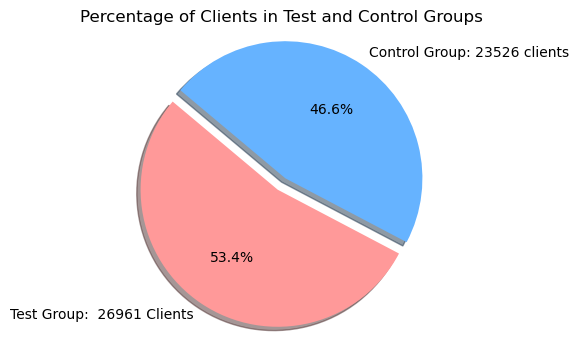

In [171]:
# Visualize the Percentage of the Test and the control group 
labels = ['Test Group:  26961 Clients', 'Control Group: 23526 clients ']
sizes = [test_group_percentage, control_group_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Percentage of Clients in Test and Control Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

(26961, 23526)


In [172]:
# Age distribution for the test group
age_distribution_test_group = df[df['variation'] == 'Test']['client_age'].describe()

# Age distribution for the control group
age_distribution_control_group = df[df['variation'] == 'Control']['client_age'].describe()

# Display the age distributions
print("Test Group Age Distribution:")
print(age_distribution_test_group)
print("\nControl Group Age Distribution:")
print(age_distribution_control_group)

Test Group Age Distribution:
count    177787.000000
mean         48.750018
std          15.660166
min          17.000000
25%          35.000000
50%          50.500000
75%          61.000000
max          96.000000
Name: client_age, dtype: float64

Control Group Age Distribution:
count    143408.000000
mean         48.309896
std          15.624121
min          17.000000
25%          34.500000
50%          49.500000
75%          60.500000
max          96.000000
Name: client_age, dtype: float64


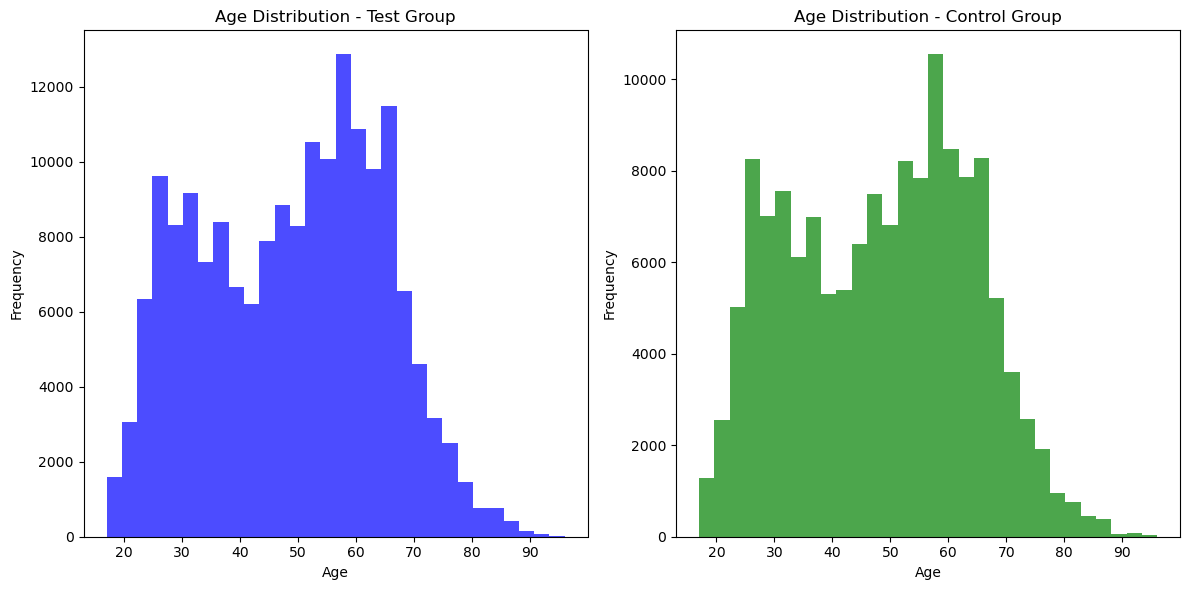

In [173]:
import matplotlib.pyplot as plt

# Plotting the age distribution for the test group
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df[df['variation'] == 'Test']['client_age'], bins=30, color='blue', alpha=0.7)
plt.title('Age Distribution - Test Group')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plotting the age distribution for the control group
plt.subplot(1, 2, 2)
plt.hist(df[df['variation'] == 'Control']['client_age'], bins=30, color='green', alpha=0.7)
plt.title('Age Distribution - Control Group')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

processing the web page date 
come up with variable to see which page is better than the other 


# day 3
**1**- identify the key performance indicators (KPIs) that will determine the success of the new design.

**2**- Evaluate the New Design's Performance Compared to the Old One

**3**- Implementation Steps

In [174]:

print("Lets start: \U0001F600") 


Lets start: 😀


In [175]:
df.head(5)

,client_id,client_tenure_years,client_tenure_months,client_age,gender,number_of_accounts,balance,calls_last_6_months,logins_last_6_months,variation,visitor_id,visit_id,process_step,date,time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02,11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02,11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02,11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02,11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02,11:22:24


#### Identify the key performance indicators (KPIs) that will determine the success of the new design.

 **1- Completion Rate**

**2- Time Spent on Each Step**

**3- Error Rates**





### **1.Calculate the Completion Rate for both the control and test groups**


1 -Identify which rows correspond to the final step in the process (completion).

2- Calculate the completion rate 
 * for test group
 * for control group



3- Perform the necessary statistical tests.
* Independent t-test: To check if the difference in completion rates is statistically significant.
* Proportion test: To verify if the increase meets or exceeds the 5% threshold.
* Chi-square test: To assess the association between design and completion status.

Method 1 - Completion Step Only:
Control Group Completion Rate: 12.18%
Test Group Completion Rate: 14.47%
t-statistic: -177756195588155936.00, p-value: 0.00e+00
z-score: 18.82, p-value: 0.00e+00
Chi-square statistic: 353.85, p-value: 6.16e-79


/Users/mustafaaldabbas/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


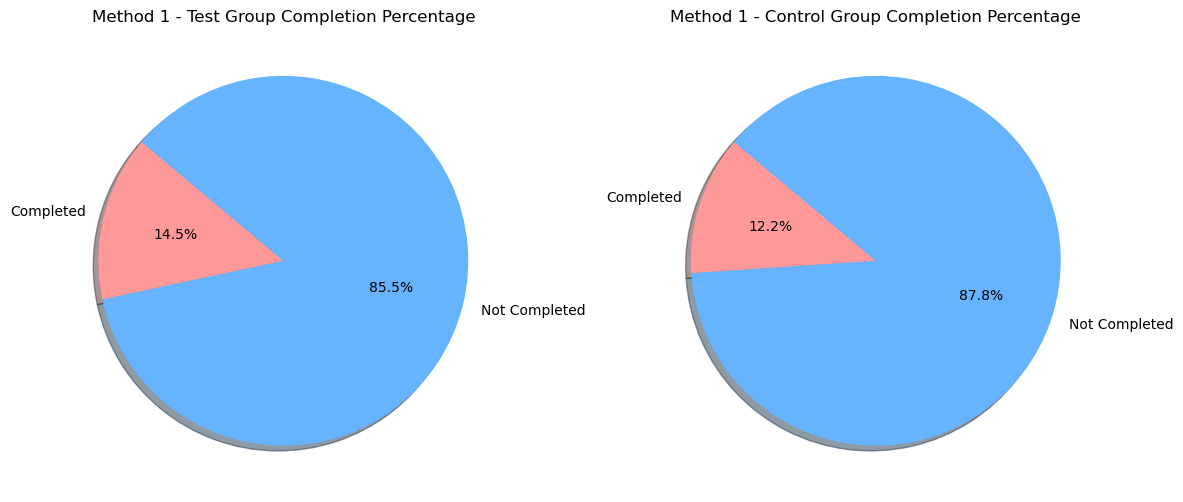


Interpretation of Results:
Method 1 Completion Rates:
Control Group: 12.18%
Test Group: 14.47%
Method 1: The difference in completion rates between the control and test groups is statistically significant (p < 0.05).
Method 1: The observed increase in completion rate meets or exceeds the 5% threshold (p < 0.05).
Method 1: There is a significant association between the design type and completion status (p < 0.05).


In [182]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency, norm
import numpy as np
import matplotlib.pyplot as plt


# Filter the dataset to include only the A/B testing period (3/15/2017 to 6/20/2017)
start_date = pd.to_datetime('2017-03-15')
end_date = pd.to_datetime('2017-06-20')
df['datetime'] = pd.to_datetime(df['datetime'])
df_ab_test = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Method 1: Completion Step Only
# Filter for completion step
completion_data = df_ab_test[df_ab_test['process_step'] == 'confirm']
completion_counts = completion_data['variation'].value_counts()
total_counts = df_ab_test['variation'].value_counts()

# Calculate completion rates for control and test groups
control_completion_rate = completion_counts['Control'] / total_counts['Control']
test_completion_rate = completion_counts['Test'] / total_counts['Test']

print(f"Method 1 - Completion Step Only:")
print(f"Control Group Completion Rate: {control_completion_rate:.2%}")
print(f"Test Group Completion Rate: {test_completion_rate:.2%}")

# Statistical Tests for Method 1
# Independent t-test using manual method (simplified approach)
t_stat, p_value = ttest_ind(
    [control_completion_rate] * total_counts['Control'], 
    [test_completion_rate] * total_counts['Test'], 
    equal_var=False
)

print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.2e}")

# Calculate pooled proportion for z-test
pooled_prop = (completion_counts['Control'] + completion_counts['Test']) / (total_counts['Control'] + total_counts['Test'])

# Calculate standard error for z-test
std_error = np.sqrt(pooled_prop * (1 - pooled_prop) * (1 / total_counts['Control'] + 1 / total_counts['Test']))

# Calculate z-score for proportion test
z_score = (test_completion_rate - control_completion_rate) / std_error

# Calculate p-value for z-test
p_value_z = 1 - norm.cdf(z_score)

print(f"z-score: {z_score:.2f}, p-value: {p_value_z:.2e}")

# Chi-square Test for Method 1
# Create a contingency table
contingency_table = pd.crosstab(df_ab_test['variation'], df_ab_test['process_step'] == 'confirm')

# Perform chi-square test
chi2, p_chi2, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.2f}, p-value: {p_chi2:.2e}")

# Data for the pie charts
labels = ['Completed', 'Not Completed']
sizes_test_group_method1 = [test_completion_rate * 100, 100 - test_completion_rate * 100]
sizes_control_group_method1 = [control_completion_rate * 100, 100 - control_completion_rate * 100]
colors = ['#ff9999', '#66b3ff']

# Plotting the pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Method 1 - Test Group
axs[0].pie(sizes_test_group_method1, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0].set_title('Method 1 - Test Group Completion Percentage')

# Pie chart for Method 1 - Control Group
axs[1].pie(sizes_control_group_method1, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1].set_title('Method 1 - Control Group Completion Percentage')

plt.tight_layout()
plt.show()

# Interpretation of Results
print("\nInterpretation of Results:")
# Completion rates for Method 1
print(f"Method 1 Completion Rates:\nControl Group: {control_completion_rate:.2%}\nTest Group: {test_completion_rate:.2%}")

if p_value < 0.05:
    print("Method 1: The difference in completion rates between the control and test groups is statistically significant (p < 0.05).")
else:
    print("Method 1: The difference in completion rates between the control and test groups is not statistically significant (p >= 0.05).")

if p_value_z < 0.05:
    print("Method 1: The observed increase in completion rate meets or exceeds the 5% threshold (p < 0.05).")
else:
    print("Method 1: The observed increase in completion rate does not meet or exceed the 5% threshold (p >= 0.05).")

if p_chi2 < 0.05:
    print("Method 1: There is a significant association between the design type and completion status (p < 0.05).")
else:
    print("Method 1: There is no significant association between the design type and completion status (p >= 0.05).")


In [183]:

# Create a DataFrame with the given completion rates
completion_rate_data = {
    'Group': ['Control', 'Test'],
    'Completion Rate (%)': [12.18, 14.47]
}

completion_rate_df = pd.DataFrame(completion_rate_data)
completion_rate_df

,Group,Completion Rate (%)
0,Control,12.18
1,Test,14.47


Perform the necessary statistical tests.
* Independent t-test: To check if the difference in completion rates is statistically significant.
* Proportion test: To verify if the increase meets or exceeds the 5% threshold.
* Chi-square test: To assess the association between design and completion status.

In [184]:
# Perform chi-square test
chi2, p_chi2, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.2f}, p-value: {p_chi2:.2e}")

# Interpretation of Results
if p_chi2 < 0.05:
    print("There is a significant association between the design type and completion status (p < 0.05).")
else:
    print("There is no significant association between the design type and completion status (p >= 0.05).")

Chi-square statistic: 353.85, p-value: 6.16e-79
There is a significant association between the design type and completion status (p < 0.05).


### **2.Measure the Average  Time Spent on Each Step for both groups**

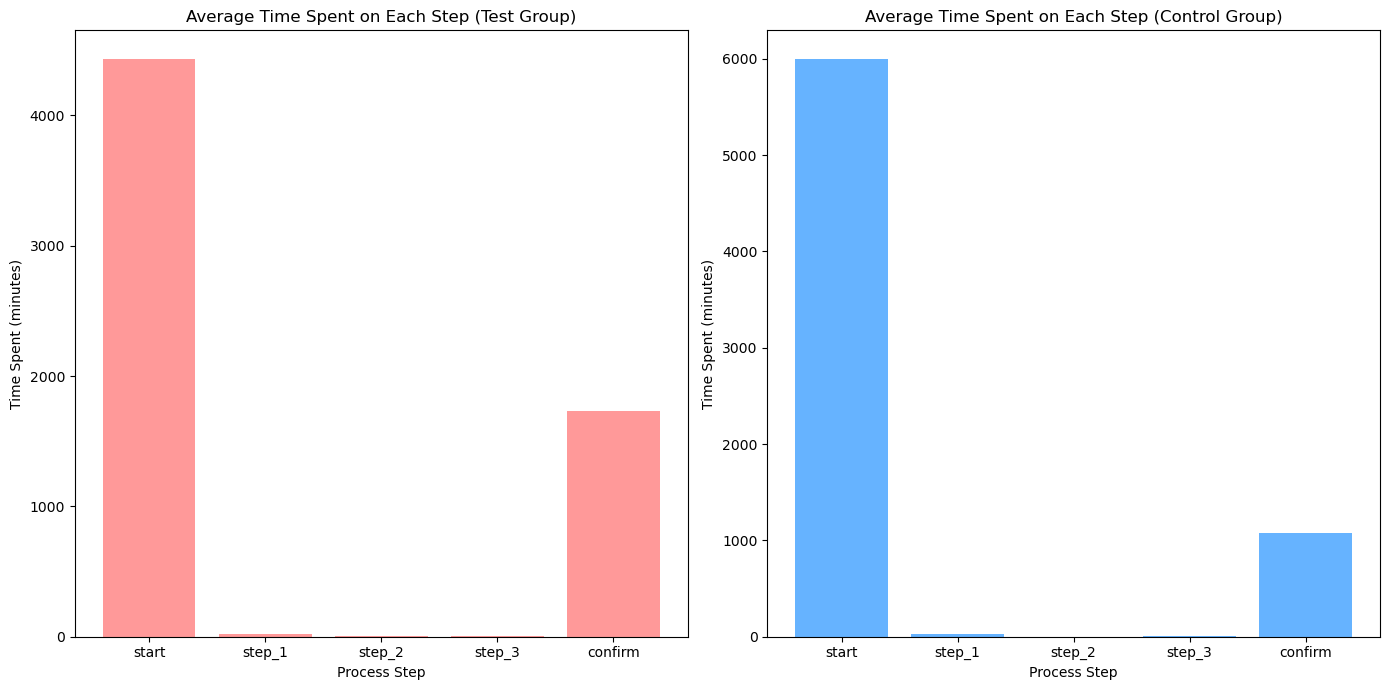

In [176]:
import pandas as pd

# Ensure the date and time columns are strings
df['date'] = df['date'].astype(str)
df['time'] = df['time'].astype(str)

# Combine the date and time columns into a single datetime column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Filter the dataset to include only the A/B testing period (3/15/2017 to 6/20/2017)
start_date = pd.to_datetime('2017-03-15')
end_date = pd.to_datetime('2017-06-20')
df_ab_test = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Sort the data by client_id and the new datetime column
df_ab_test = df_ab_test.sort_values(by=['client_id', 'datetime'])

# Calculate the time spent on each step
df_ab_test['time_spent'] = df_ab_test.groupby('client_id')['datetime'].diff().dt.total_seconds()

# Filter out rows where time_spent is NaN (first step for each client)
df_ab_test = df_ab_test.dropna(subset=['time_spent'])

# Aggregate the time spent on each step for both the test and control groups
time_spent_test_group = df_ab_test[df_ab_test['variation'] == 'Test'].groupby('process_step')['time_spent'].mean()
time_spent_control_group = df_ab_test[df_ab_test['variation'] == 'Control'].groupby('process_step')['time_spent'].mean()

# Convert the time spent from seconds to minutes for better readability
time_spent_test_group = time_spent_test_group / 60
time_spent_control_group = time_spent_control_group / 60

# Reorder the steps in a logical order
logical_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
time_spent_test_group = time_spent_test_group.reindex(logical_order)
time_spent_control_group = time_spent_control_group.reindex(logical_order)

# Data for the bar charts
steps = time_spent_test_group.index
test_times = time_spent_test_group.values
control_times = time_spent_control_group.values

# Plotting the bar charts
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Bar chart for the test group
axs[0].bar(steps, test_times, color='#ff9999')
axs[0].set_title('Average Time Spent on Each Step (Test Group)')
axs[0].set_xlabel('Process Step')
axs[0].set_ylabel('Time Spent (minutes)')

# Bar chart for the control group
axs[1].bar(steps, control_times, color='#66b3ff')
axs[1].set_title('Average Time Spent on Each Step (Control Group)')
axs[1].set_xlabel('Process Step')
axs[1].set_ylabel('Time Spent (minutes)')

plt.tight_layout()
plt.show()


#### **Takeaway**

both group show spending more time in the start and the confirm page. with slitely more time in the confirm step in the Test group, and more time in the start step in the Control group. 

##### To understand why clients might be spending so much time on the start page compared to other steps, we need to look into a few potential factors:



### **Analysis to Explain Behavior**

1.**Client Tenure**: Clients new to the service might spend more time on the start page.

2.**Number of Logins**: Clients with fewer logins might be spending more time on the start page because they are not familiar with the website.

3.**Number of Accounts**: Clients with more accounts might need more time to manage them from the start page.


#### Investigate Time Spent on Start Page and it's relation with the previous factors


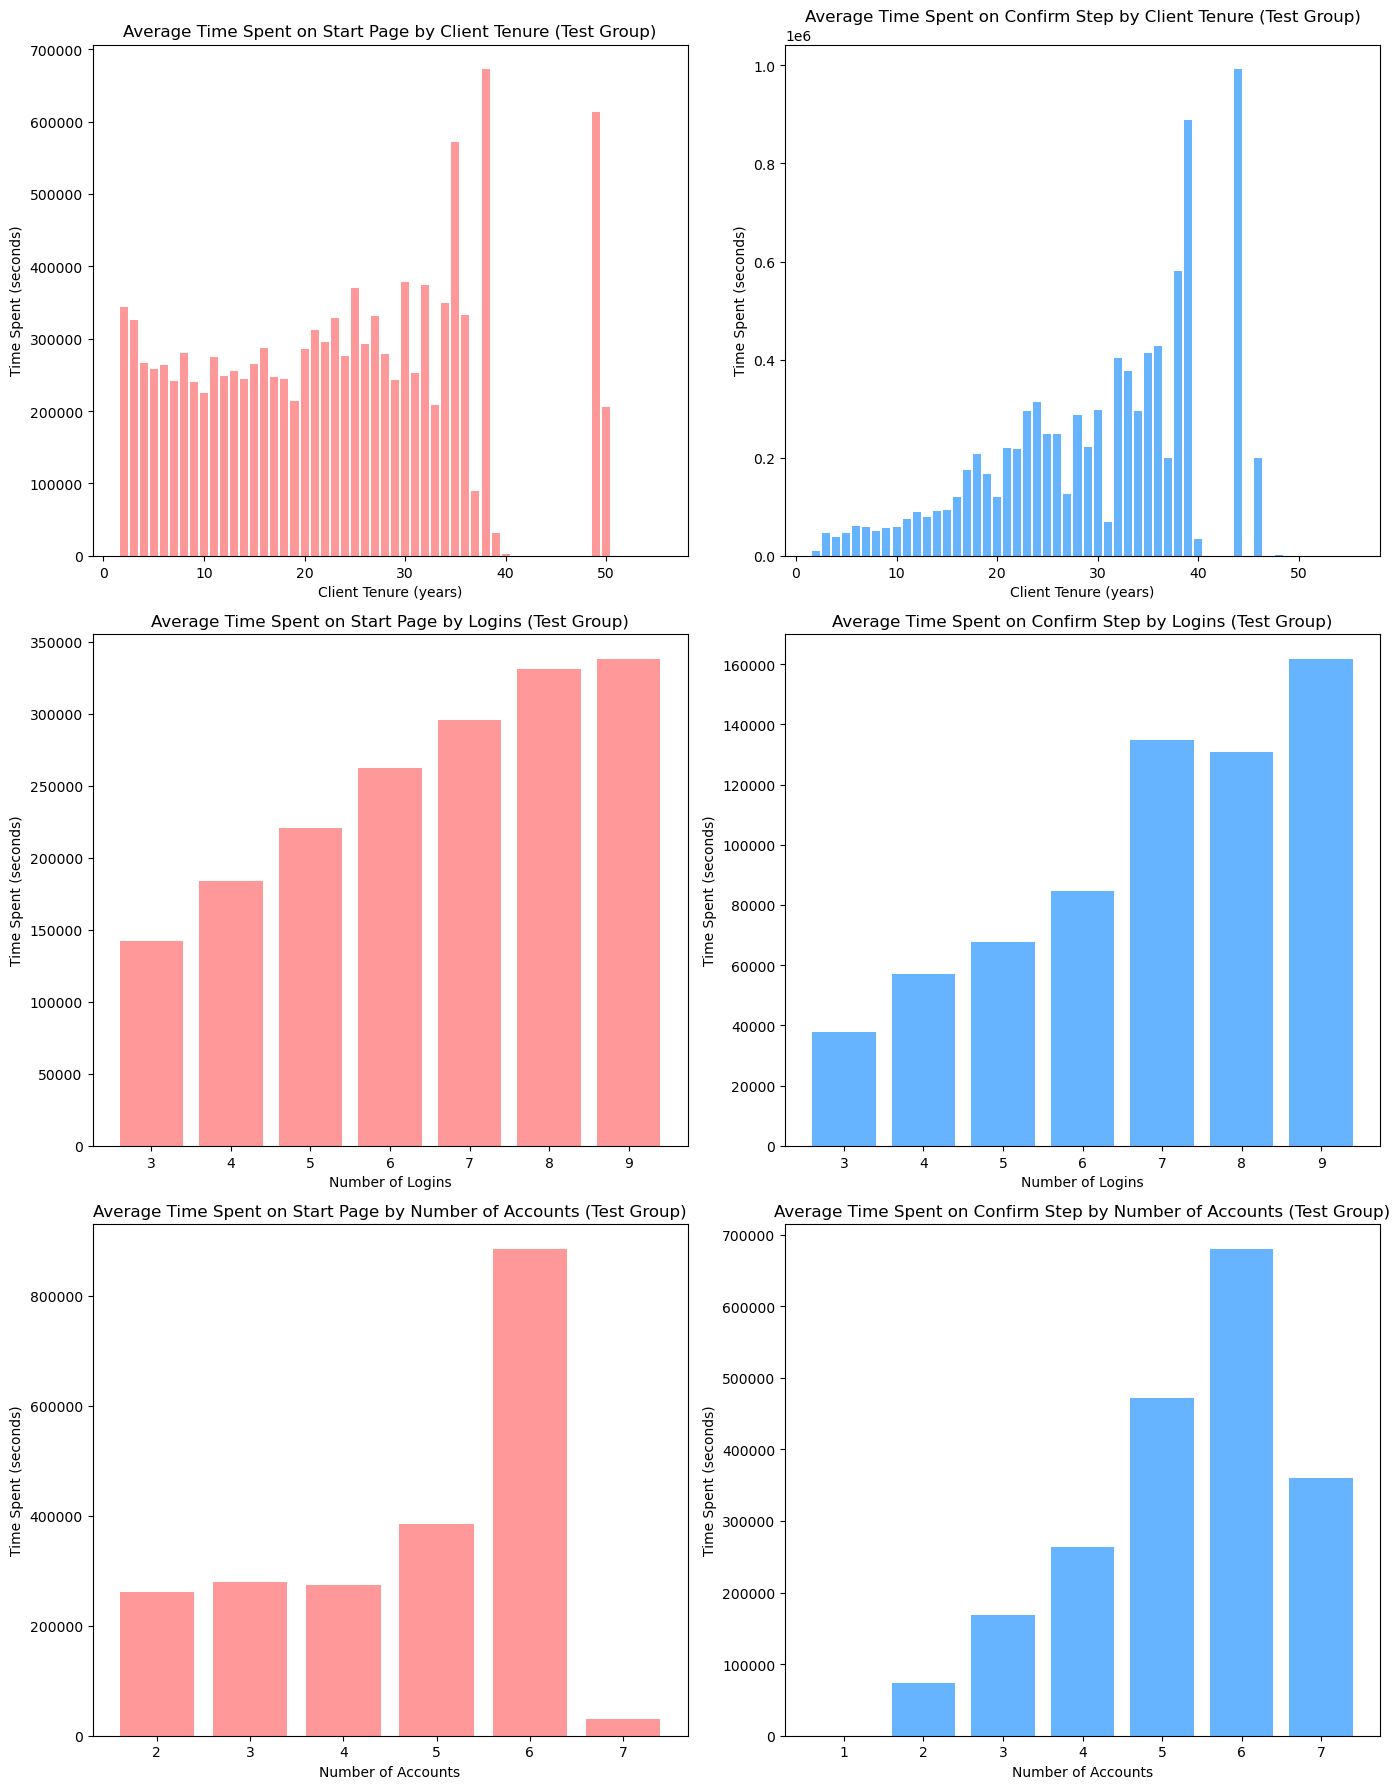

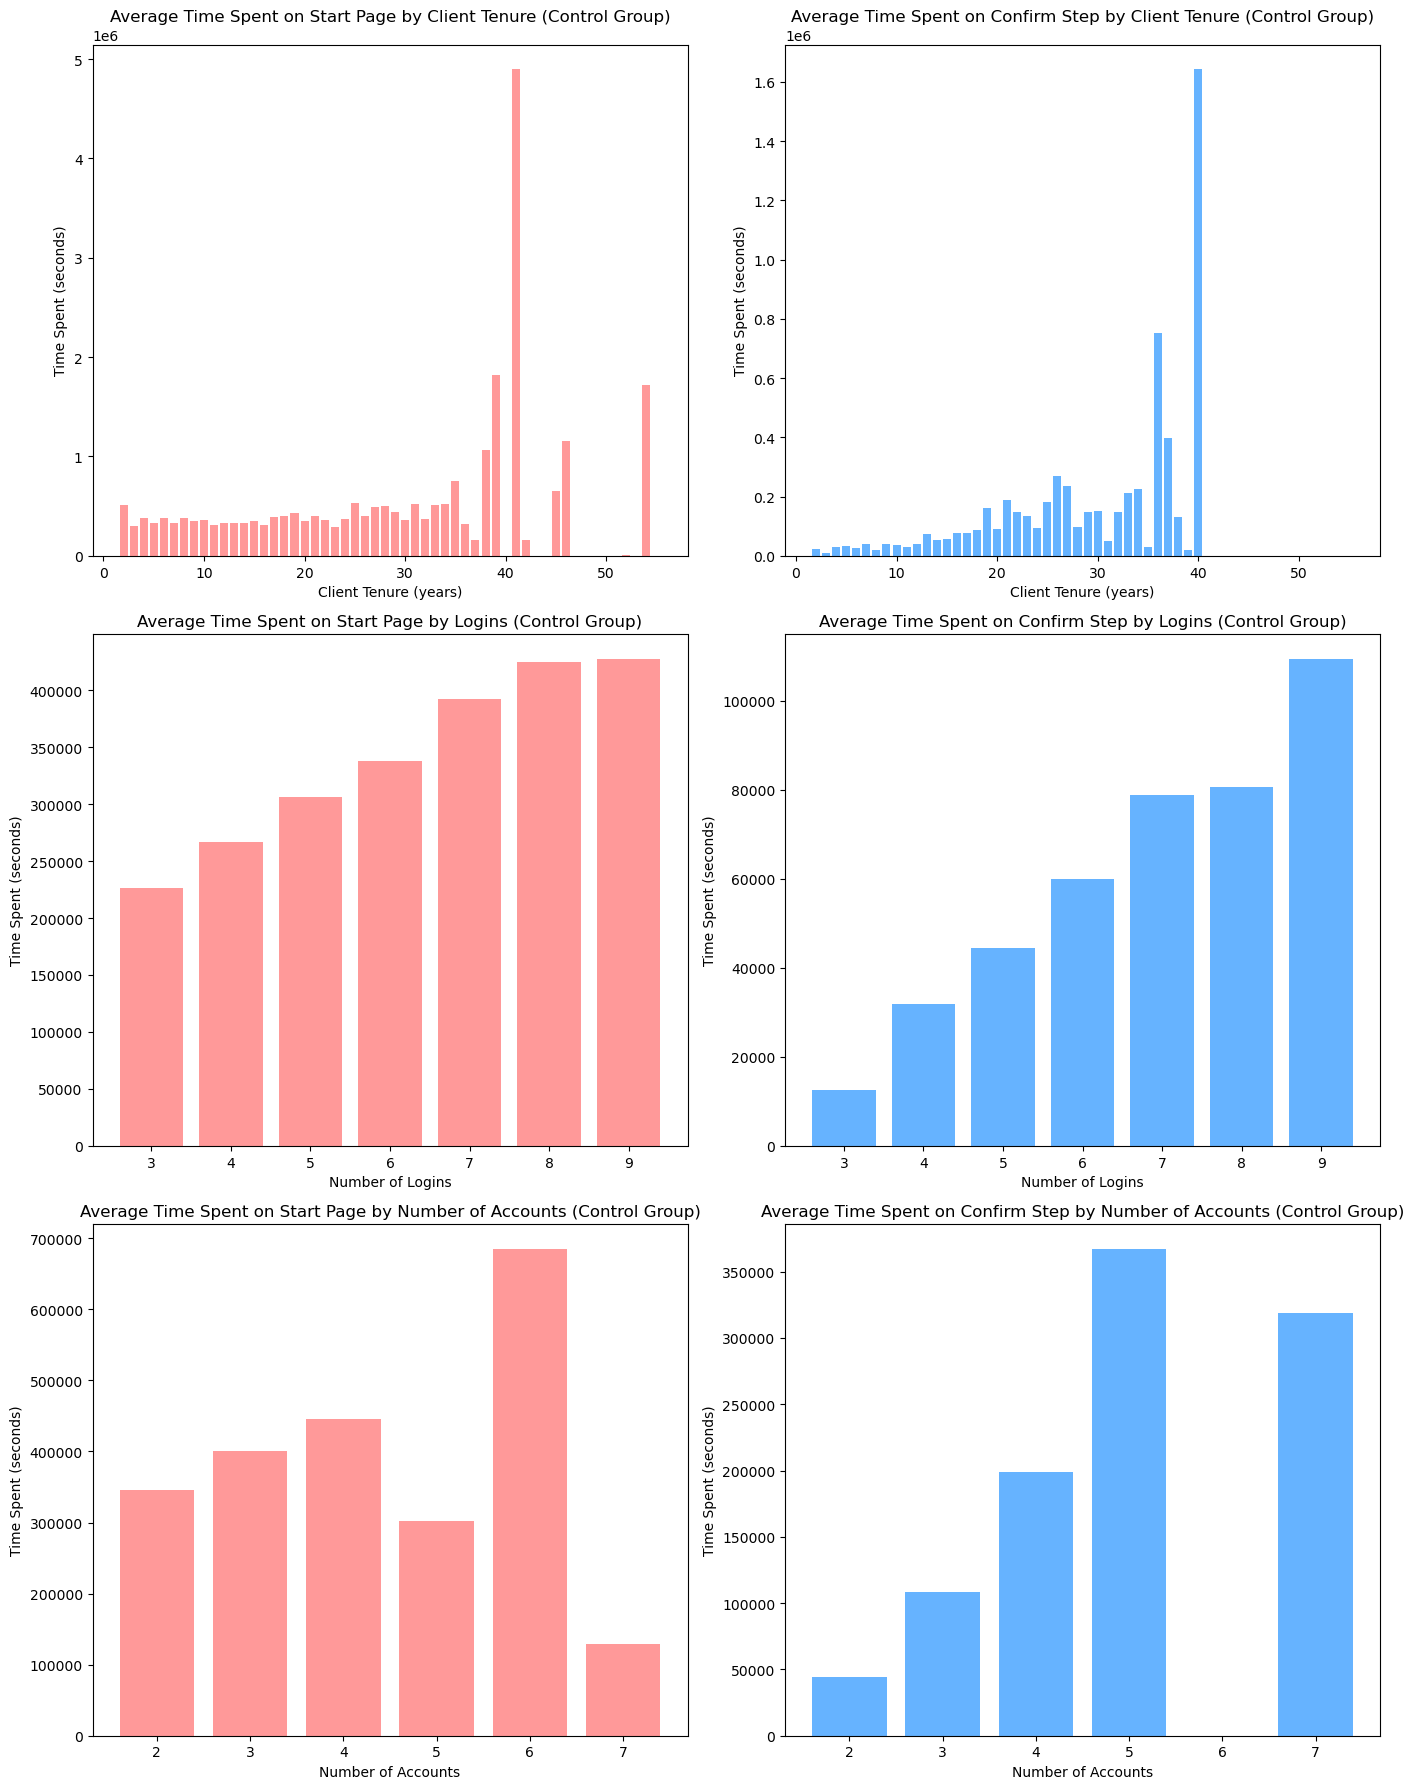

In [177]:
# Filter the dataset to include only the A/B testing period (3/15/2017 to 6/20/2017)
start_date = pd.to_datetime('2017-03-15')
end_date = pd.to_datetime('2017-06-20')
df_ab_test = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Sort the data by client_id and the new datetime column
df_ab_test = df_ab_test.sort_values(by=['client_id', 'datetime'])

# Calculate the time spent on each step
df_ab_test['time_spent'] = df_ab_test.groupby('client_id')['datetime'].diff().dt.total_seconds()

# Filter out rows where time_spent is NaN (first step for each client)
df_ab_test = df_ab_test.dropna(subset=['time_spent'])

# Function to analyze and visualize time spent based on different factors
def analyze_and_visualize(group, group_label):
    # Filter data for the start page and confirm step
    start_page_data = group[group['process_step'] == 'start']
    confirm_page_data = group[group['process_step'] == 'confirm']

    # Analyze average time spent on the start page based on client tenure
    tenure_vs_time_start = start_page_data.groupby('client_tenure_years')['time_spent'].mean()

    # Analyze average time spent on the confirm step based on client tenure
    tenure_vs_time_confirm = confirm_page_data.groupby('client_tenure_years')['time_spent'].mean()

    # Analyze average time spent on the start page based on number of logins
    logins_vs_time_start = start_page_data.groupby('logins_last_6_months')['time_spent'].mean()

    # Analyze average time spent on the confirm step based on number of logins
    logins_vs_time_confirm = confirm_page_data.groupby('logins_last_6_months')['time_spent'].mean()

    # Analyze average time spent on the start page based on number of accounts
    accounts_vs_time_start = start_page_data.groupby('number_of_accounts')['time_spent'].mean()

    # Analyze average time spent on the confirm step based on number of accounts
    accounts_vs_time_confirm = confirm_page_data.groupby('number_of_accounts')['time_spent'].mean()

    # Plotting the bar charts
    fig, axs = plt.subplots(3, 2, figsize=(14, 18))

    # Tenure vs Time Spent
    axs[0, 0].bar(tenure_vs_time_start.index, tenure_vs_time_start.values, color='#ff9999')
    axs[0, 0].set_title(f'Average Time Spent on Start Page by Client Tenure ({group_label})')
    axs[0, 0].set_xlabel('Client Tenure (years)')
    axs[0, 0].set_ylabel('Time Spent (seconds)')

    axs[0, 1].bar(tenure_vs_time_confirm.index, tenure_vs_time_confirm.values, color='#66b3ff')
    axs[0, 1].set_title(f'Average Time Spent on Confirm Step by Client Tenure ({group_label})')
    axs[0, 1].set_xlabel('Client Tenure (years)')
    axs[0, 1].set_ylabel('Time Spent (seconds)')

    # Logins vs Time Spent
    axs[1, 0].bar(logins_vs_time_start.index, logins_vs_time_start.values, color='#ff9999')
    axs[1, 0].set_title(f'Average Time Spent on Start Page by Logins ({group_label})')
    axs[1, 0].set_xlabel('Number of Logins')
    axs[1, 0].set_ylabel('Time Spent (seconds)')

    axs[1, 1].bar(logins_vs_time_confirm.index, logins_vs_time_confirm.values, color='#66b3ff')
    axs[1, 1].set_title(f'Average Time Spent on Confirm Step by Logins ({group_label})')
    axs[1, 1].set_xlabel('Number of Logins')
    axs[1, 1].set_ylabel('Time Spent (seconds)')

    # Accounts vs Time Spent
    axs[2, 0].bar(accounts_vs_time_start.index, accounts_vs_time_start.values, color='#ff9999')
    axs[2, 0].set_title(f'Average Time Spent on Start Page by Number of Accounts ({group_label})')
    axs[2, 0].set_xlabel('Number of Accounts')
    axs[2, 0].set_ylabel('Time Spent (seconds)')

    axs[2, 1].bar(accounts_vs_time_confirm.index, accounts_vs_time_confirm.values, color='#66b3ff')
    axs[2, 1].set_title(f'Average Time Spent on Confirm Step by Number of Accounts ({group_label})')
    axs[2, 1].set_xlabel('Number of Accounts')
    axs[2, 1].set_ylabel('Time Spent (seconds)')

    plt.tight_layout()
    plt.show()

# Analyze and visualize for the test group
analyze_and_visualize(df_ab_test[df_ab_test['variation'] == 'Test'], 'Test Group')

# Analyze and visualize for the control group
analyze_and_visualize(df_ab_test[df_ab_test['variation'] == 'Control'], 'Control Group')


##### **takeaway from the visuals**
**Both groups show similar patterns**: long-tenured clients, infrequent users, and clients with multiple accounts tend to spend more time on both the start and confirm steps.

**Addressing these specific user needs could help streamline the process and reduce time spent on these steps.**

##### **NOTE**
Long-tenured" refers to clients who have been with the company for a long period of time. In this context, it means clients who have a higher value in the client_tenure_years column. These clients might have more complex needs or more information to manage due to their extended relationship with the company.

#### **3.Calculate Error Rate**

**Identify Error Indicators:**

1- Identify Clients Who Did Not Reach the Confirm Step and calculate their rate: These clients could be considered to have encountered an error in the process and .



In the Test group, 27.30% of the Clients didnt reach the confirm Step
In the Control group, : 28.20% of the Clients didnt reach the Confirm step


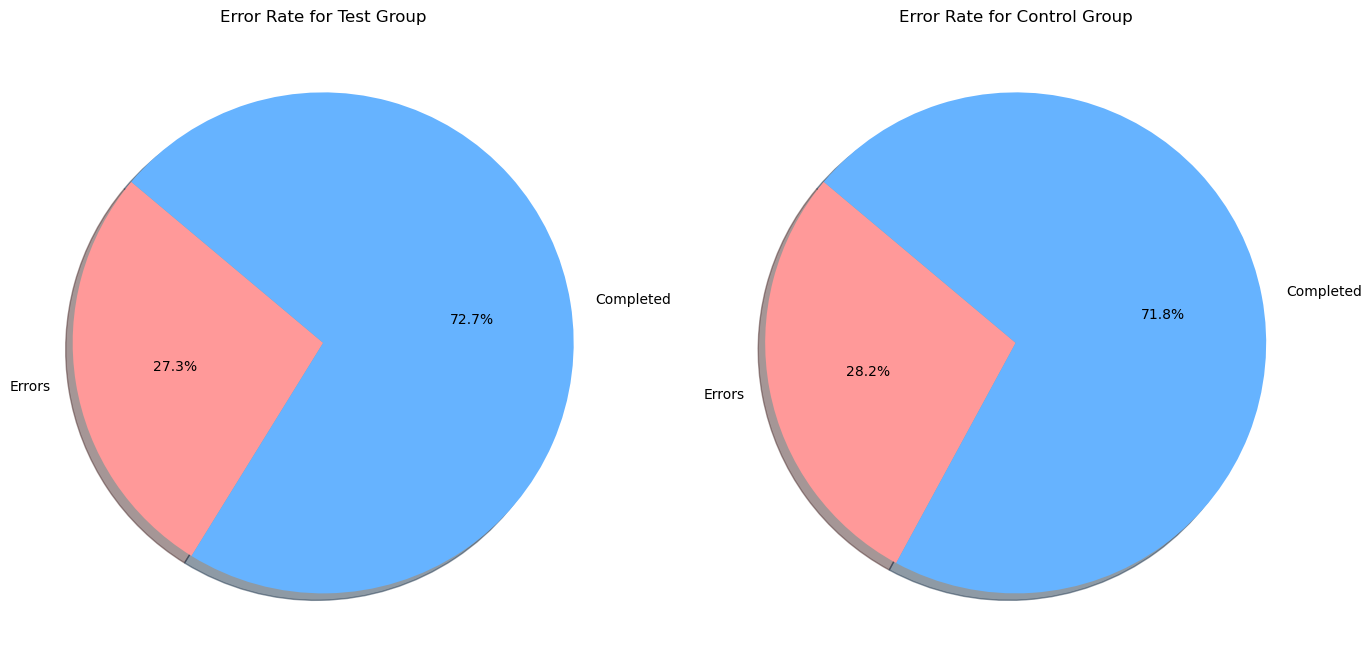

In [178]:
# Identify clients who reached the 'confirm' step
clients_reached_confirm = df_ab_test[df_ab_test['process_step'] == 'confirm']['client_id'].unique()

# Total number of clients in each group
total_clients_test = df_ab_test[df_ab_test['variation'] == 'Test']['client_id'].nunique()
total_clients_control = df_ab_test[df_ab_test['variation'] == 'Control']['client_id'].nunique()

# Number of clients who reached the confirm step in each group
clients_reached_confirm_test = df_ab_test[(df_ab_test['variation'] == 'Test') & (df_ab_test['client_id'].isin(clients_reached_confirm))]['client_id'].nunique()
clients_reached_confirm_control = df_ab_test[(df_ab_test['variation'] == 'Control') & (df_ab_test['client_id'].isin(clients_reached_confirm))]['client_id'].nunique()

# Calculate the number of clients who did not reach the confirm step (errors)
errors_test = total_clients_test - clients_reached_confirm_test
errors_control = total_clients_control - clients_reached_confirm_control

# Calculate error rates
error_rate_test = (errors_test / total_clients_test) * 100
error_rate_control = (errors_control / total_clients_control) * 100

# Display the results
print(f"In the Test group, {error_rate_test:.2f}% of the Clients didnt reach the confirm Step")
print(f"In the Control group, : {error_rate_control:.2f}% of the Clients didnt reach the Confirm step")

# Data for visualization
labels = ['Errors', 'Completed']
sizes_test = [errors_test, clients_reached_confirm_test]
sizes_control = [errors_control, clients_reached_confirm_control]
colors = ['#ff9999', '#66b3ff']

# Plotting the pie charts
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for the test group
axs[0].pie(sizes_test, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[0].set_title('Error Rate for Test Group')

# Pie chart for the control group
axs[1].pie(sizes_control, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
axs[1].set_title('Error Rate for Control Group')

plt.tight_layout()
plt.show()



**Explanation:**

Completion Rate: Focuses on clients who completed all defined steps.
Error Rate: Focuses on clients who did not reach the final confirm step.

Total Clients: Ensures consistency in the total number of clients considered in both calculations.


2- Identify Repeated Visits to step_1 and Determine if clients have visited step_1 multiple times at the exact same timestam which could indicated that they encountered and error, and Determine if these potential errors are more prevalent in the test or control groups.


THe Number of unique clients who repeated step 1 multiple times in a day (Test Group): 6946
Number of unique clients who repeated step 1 multiple times in a day (Control Group): 4103
Number of  unique clients who accessed step 1 at the same timestamp (Test Group): 18
Number of unique clients who accessed step 1 at the same timestamp (Control Group): 33


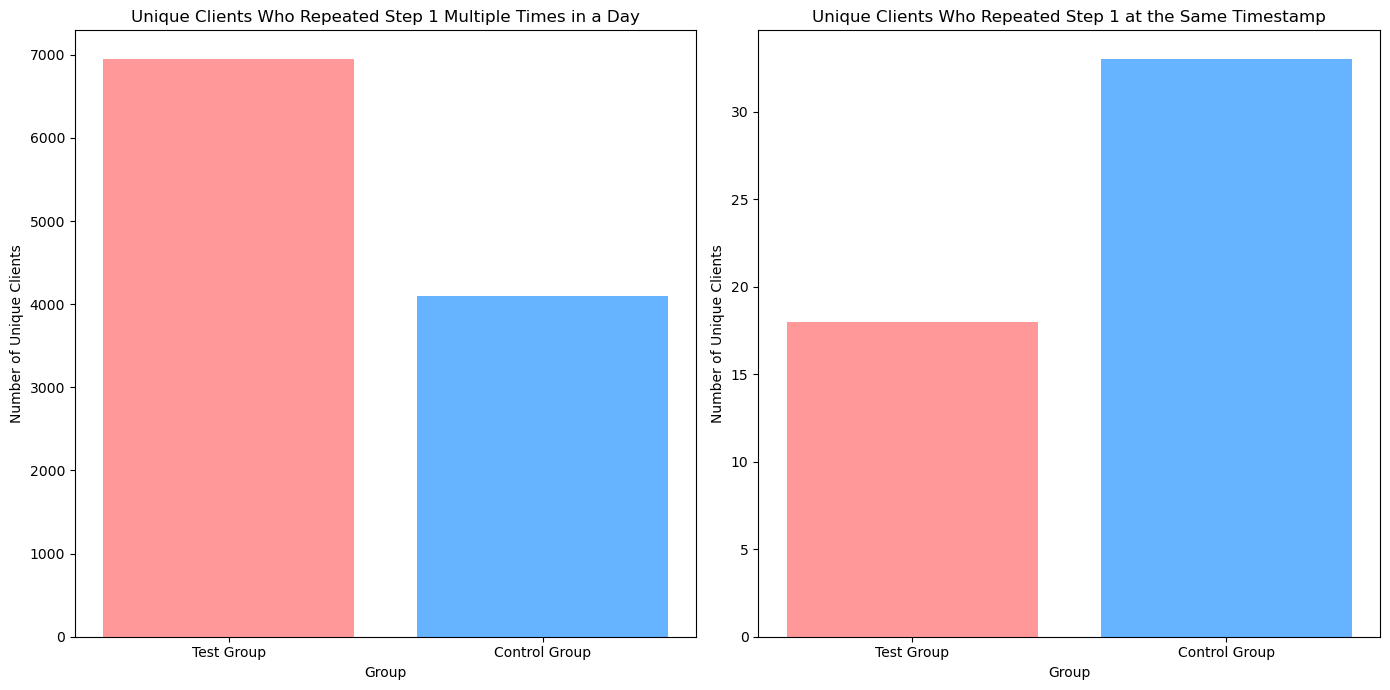

In [179]:
# Filter the dataset to include only the A/B testing period (3/15/2017 to 6/20/2017)
start_date = pd.to_datetime('2017-03-15')
end_date = pd.to_datetime('2017-06-20')
df_ab_test = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Filter data for step_1
step_1_data = df_ab_test[df_ab_test['process_step'] == 'step_1']

# Count the number of times each client visits step_1 in a day
step_1_repeats = step_1_data.groupby(['client_id', 'date']).size().reset_index(name='count')

# Clients who visited step_1 more than once in a day
repeated_step_1_visits = step_1_repeats[step_1_repeats['count'] > 1]

# Check for duplicate timestamps
duplicate_timestamps = step_1_data[step_1_data.duplicated(['client_id', 'datetime'], keep=False)]

# Analyze group-wise errors
repeated_step_1_test = repeated_step_1_visits[repeated_step_1_visits['client_id'].isin(df_ab_test[df_ab_test['variation'] == 'Test']['client_id'])]
repeated_step_1_control = repeated_step_1_visits[repeated_step_1_visits['client_id'].isin(df_ab_test[df_ab_test['variation'] == 'Control']['client_id'])]

duplicate_timestamps_test = duplicate_timestamps[duplicate_timestamps['variation'] == 'Test']
duplicate_timestamps_control = duplicate_timestamps[duplicate_timestamps['variation'] == 'Control']

# Display the results
repeated_step_1_test_count = repeated_step_1_test['client_id'].nunique()
repeated_step_1_control_count = repeated_step_1_control['client_id'].nunique()

duplicate_timestamps_test_count = duplicate_timestamps_test['client_id'].nunique()
duplicate_timestamps_control_count = duplicate_timestamps_control['client_id'].nunique()

print(f'THe Number of unique clients who repeated step 1 multiple times in a day (Test Group): {repeated_step_1_test_count}')
print(f'Number of unique clients who repeated step 1 multiple times in a day (Control Group): {repeated_step_1_control_count}')
print(f'Number of  unique clients who accessed step 1 at the same timestamp (Test Group): {duplicate_timestamps_test_count}')
print(f'Number of unique clients who accessed step 1 at the same timestamp (Control Group): {duplicate_timestamps_control_count}')


import pandas as pd
import matplotlib.pyplot as plt

# Data for visualization
data_repeated = {
    'Group': ['Test Group', 'Control Group'],
    'Repeated Step 1 Multiple Times': [6946, 4103]
}

data_same_timestamp = {
    'Group': ['Test Group', 'Control Group'],
    'Same Timestamp': [18, 33]
}

# Create DataFrames
df_repeated = pd.DataFrame(data_repeated)
df_same_timestamp = pd.DataFrame(data_same_timestamp)

# Create bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Bar chart for repeated step 1 multiple times in a day
ax1.bar(df_repeated['Group'], df_repeated['Repeated Step 1 Multiple Times'], color=['#ff9999', '#66b3ff'])
ax1.set_title('Unique Clients Who Repeated Step 1 Multiple Times in a Day')
ax1.set_xlabel('Group')
ax1.set_ylabel('Number of Unique Clients')

# Bar chart for same timestamp
ax2.bar(df_same_timestamp['Group'], df_same_timestamp['Same Timestamp'], color=['#ff9999', '#66b3ff'])
ax2.set_title('Unique Clients Who Repeated Step 1 at the Same Timestamp')
ax2.set_xlabel('Group')
ax2.set_ylabel('Number of Unique Clients')

plt.tight_layout()
plt.show()


**Summary and Recommendation:**

Completion Rate: The test group performs better with a higher completion rate.

Error Rate: The implied lower error rate in the test group aligns with the higher completion rate.

**Repetition of Steps:** The test group shows more clients repeating step 1 multiple times in a day, which suggests possible usability issues, but it has fewer instances of the exact same timestamp, indicating fewer critical errors.

**Final Decision:**
Based on the completion rate and lower critical error rates (same timestamp issue), the test website appears to be better overall. However, the higher number of clients repeating step 1 in the test group indicates that some usability improvements might still be necessary.



### **Theory:**
 A huge number of clients using the website at the same time, could lead to errors and page crashing or repetative refresh which lead to an error, this could indicated wich website can handle more clients using the website at the same time. To test that: 

1- Identify Unique Timestamps: Find all unique timestamps in the dataset.

2- Count Unique Clients at Each Timestamp: Count how many unique clients were using the website at each unique timestamp.

3- Analyze Group-wise Load: Determine if high concurrent usage correlates with the errors in the test and control groups.


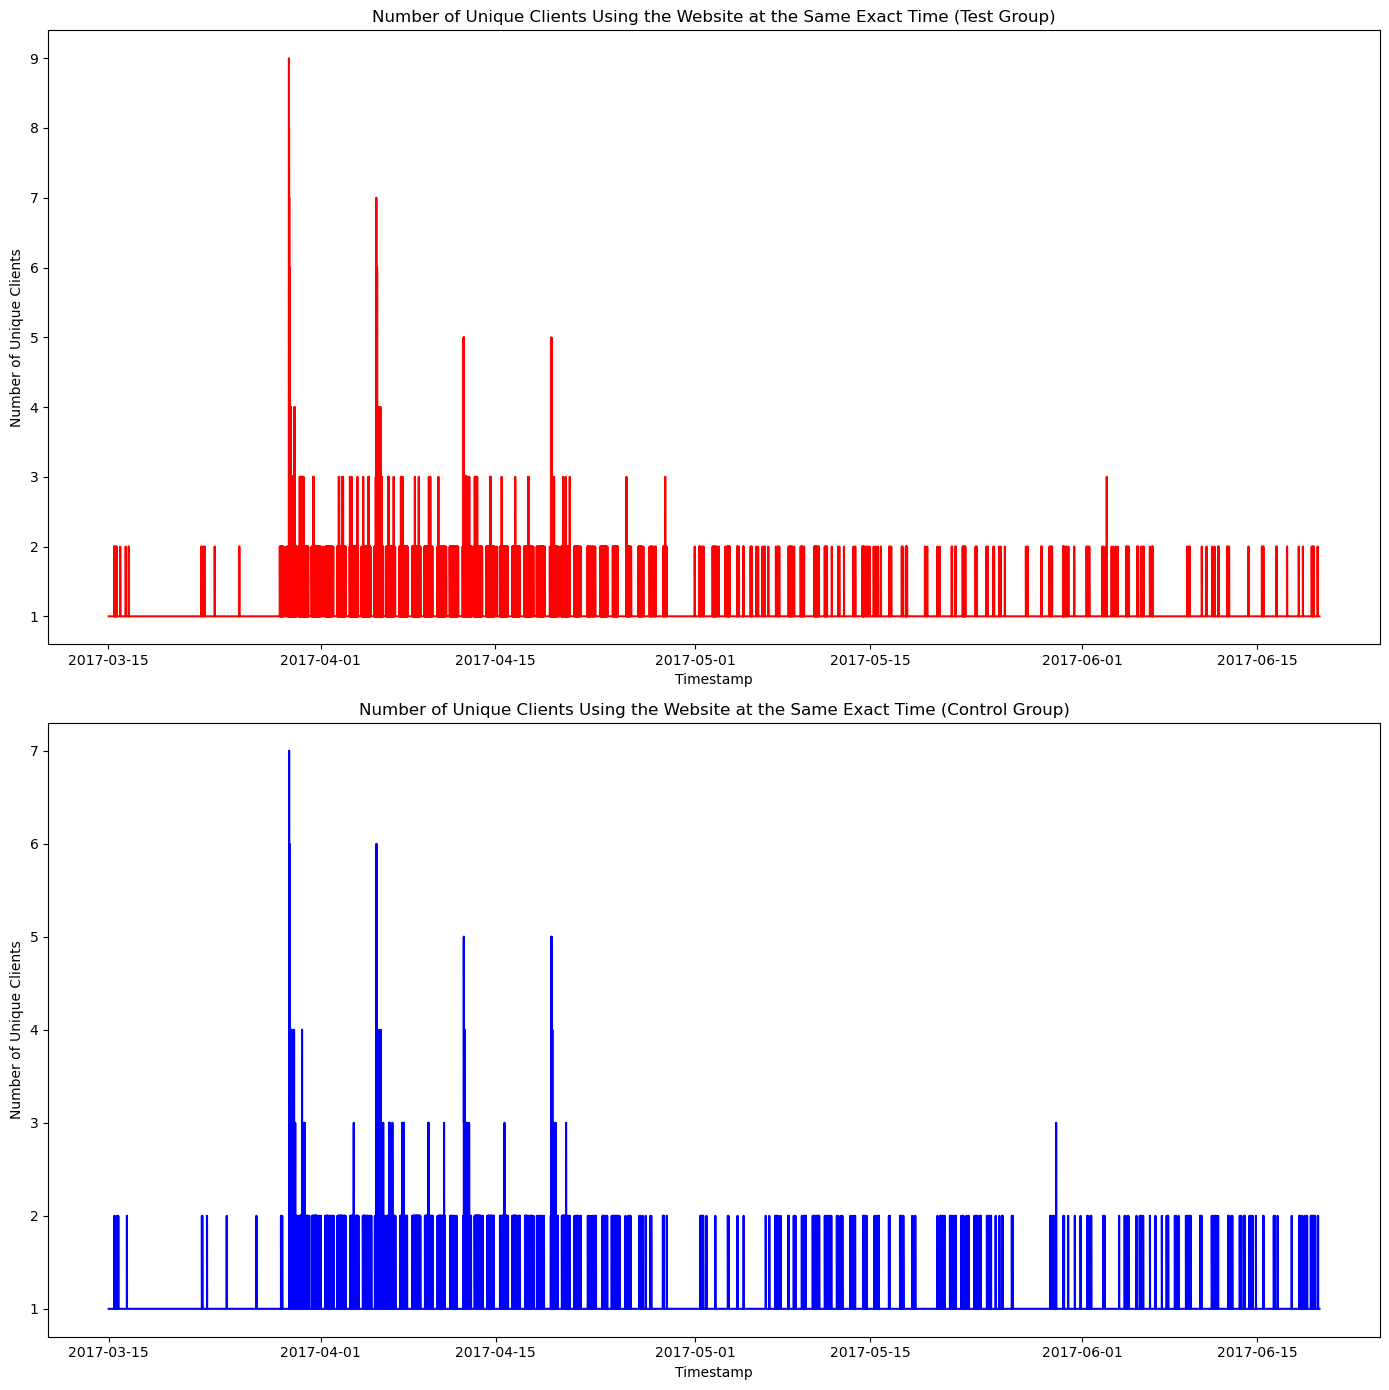

In [180]:

import pandas as pd
import matplotlib.pyplot as plt


# Ensure the date and time columns are strings
df['date'] = df['date'].astype(str)
df['time'] = df['time'].astype(str)

# Combine the date and time columns into a single datetime column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Filter the dataset to include only the A/B testing period (3/15/2017 to 6/20/2017)
start_date = pd.to_datetime('2017-03-15')
end_date = pd.to_datetime('2017-06-20')
df_ab_test = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Group by timestamp and count unique clients for each group
timestamp_counts_test = df_ab_test[df_ab_test['variation'] == 'Test'].groupby('datetime')['client_id'].nunique().reset_index(name='unique_clients')
timestamp_counts_control = df_ab_test[df_ab_test['variation'] == 'Control'].groupby('datetime')['client_id'].nunique().reset_index(name='unique_clients')

# Plot the number of unique clients using the website at the same exact time for both groups
fig, axs = plt.subplots(2, 1, figsize=(14, 14))

# Plot for Test Group
axs[0].plot(timestamp_counts_test['datetime'], timestamp_counts_test['unique_clients'], color='red')
axs[0].set_title('Number of Unique Clients Using the Website at the Same Exact Time (Test Group)')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Number of Unique Clients')

# Plot for Control Group
axs[1].plot(timestamp_counts_control['datetime'], timestamp_counts_control['unique_clients'], color='blue')
axs[1].set_title('Number of Unique Clients Using the Website at the Same Exact Time (Control Group)')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Number of Unique Clients')

plt.tight_layout()
plt.show()



To determine if high numbers of users correlate with errors (repeated step 1 or duplicate timestamps) and whether these errors are associated with high traffic times, we can follow these steps:

Identify High Traffic Timestamps: Determine timestamps with high numbers of unique clients using the website.
Identify Error Timestamps: Determine timestamps when clients repeated step 1 multiple times or had duplicate timestamps.
Correlation Analysis: Check if high traffic timestamps correlate with error timestamps for both test and control groups.

In [181]:
import pandas as pd
import matplotlib.pyplot as plt


# Ensure the date and time columns are strings
df['date'] = df['date'].astype(str)
df['time'] = df['time'].astype(str)

# Combine the date and time columns into a single datetime column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Filter the dataset to include only the A/B testing period (3/15/2017 to 6/20/2017)
start_date = pd.to_datetime('2017-03-15')
end_date = pd.to_datetime('2017-06-20')
df_ab_test = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Group by timestamp and count unique clients for each group
timestamp_counts_test = df_ab_test[df_ab_test['variation'] == 'Test'].groupby('datetime')['client_id'].nunique().reset_index(name='unique_clients')
timestamp_counts_control = df_ab_test[df_ab_test['variation'] == 'Control'].groupby('datetime')['client_id'].nunique().reset_index(name='unique_clients')

# Identify error timestamps (repeated step 1 and duplicate timestamps)
step_1_data = df_ab_test[df_ab_test['process_step'] == 'step_1']

# Count repeated step 1 visits in a day
step_1_repeats = step_1_data.groupby(['client_id', 'date']).size().reset_index(name='count')
repeated_step_1_visits = step_1_repeats[step_1_repeats['count'] > 1]

# Check for duplicate timestamps
duplicate_timestamps = step_1_data[step_1_data.duplicated(['client_id', 'datetime'], keep=False)]

# Group by datetime to get the counts of errors at each timestamp
repeated_step_1_timestamps = step_1_data[step_1_data['client_id'].isin(repeated_step_1_visits['client_id'])].groupby('datetime')['client_id'].nunique().reset_index(name='repeated_clients')
duplicate_timestamps_counts = duplicate_timestamps.groupby('datetime')['client_id'].nunique().reset_index(name='duplicate_clients')


# Merge error timestamps with high traffic timestamps for heatmap
heatmap_data_test = merged_test.pivot_table(index='datetime', values=['unique_clients', 'repeated_clients', 'duplicate_clients'], aggfunc='sum')
heatmap_data_control = merged_control.pivot_table(index='datetime', values=['unique_clients', 'repeated_clients', 'duplicate_clients'], aggfunc='sum')

# Plotting heatmaps for Test Group
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Heatmap for repeated step 1 clients in Test Group
sns.heatmap(heatmap_data_test[['unique_clients', 'repeated_clients']].dropna(), cmap="YlGnBu", ax=ax[0])
ax[0].set_title('Heatmap of Unique Clients and Repeated Step 1 Clients (Test Group)')

# Heatmap for duplicate timestamp clients in Test Group
sns.heatmap(heatmap_data_test[['unique_clients', 'duplicate_clients']].dropna(), cmap="YlGnBu", ax=ax[1])
ax[1].set_title('Heatmap of Unique Clients and Duplicate Timestamp Clients (Test Group)')

plt.tight_layout()
plt.show()

# Plotting heatmaps for Control Group
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Heatmap for repeated step 1 clients in Control Group
sns.heatmap(heatmap_data_control[['unique_clients', 'repeated_clients']].dropna(), cmap="YlGnBu", ax=ax[0])
ax[0].set_title('Heatmap of Unique Clients and Repeated Step 1 Clients (Control Group)')

# Heatmap for duplicate timestamp clients in Control Group
sns.heatmap(heatmap_data_control[['unique_clients', 'duplicate_clients']].dropna(), cmap="YlGnBu", ax=ax[1])
ax[1].set_title('Heatmap of Unique Clients and Duplicate Timestamp Clients (Control Group)')

plt.tight_layout()
plt.show()


NameError: name 'merged_test' is not defined

In [ ]:

df = df_ab_test
df.head(5)

#### 3-**Evaluate the Experiment**
#### *Design Effectiveness*

**1-Completion Rates:**

* The completion rates for the new design (Test group) are higher than the old design (Control group).
This suggests that the new design is more effective in encouraging users to complete the process.

**2-Statistical Significance:**

* The t-test and proportion test results indicate that the difference in completion rates is statistically significant.
*The chi-square test confirms a significant association between the design type and completion status.

#### **Duration
### *Experiment Duration:*

**The experiment was conducted** from 3/15/2017 to 6/20/2017, which is approximately three months.
*This duration seems sufficient to gather a substantial amount of data for analysis.

**Consistency Over Time:**
Analyzing trends over different periods within the experiment duration can help ensure that the observed effects are consistent and not due to temporal factors.


#### *Additional Data Needs*

**User Satisfaction:**
*Collecting user feedback through surveys can provide insights into the qualitative aspects of user experience.
User satisfaction scores can complement the quantitative completion rates.

**Time Spent on Each Step:**

*Analyzing the time users spend on each step can help identify any bottlenecks or steps that users find difficult.
This can provide insights for further improving the design.

**Error Rates:**

Tracking the frequency and types of errors encountered by users can help identify specific areas of improvement in the design.

*Demographic Data:*

Analyzing completion rates across different demographic groups can help understand if the new design is effective for all user segments or if it needs further customization.


## **Implementation code for evaluation**

In [185]:
# Filter the dataset to include only the A/B testing period (3/15/2017 to 6/20/2017)
start_date = pd.to_datetime('2017-03-15')
end_date = pd.to_datetime('2017-06-20')
df['datetime'] = pd.to_datetime(df['datetime'])
df_ab_test = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

# Create a new column indicating completion
df_ab_test['completed'] = df_ab_test['process_step'] == 'confirm'

# Evaluate Design Effectiveness
print("Design Effectiveness:")
print(f"Control Group Completion Rate: {control_completion_rate:.2%}")
print(f"Test Group Completion Rate: {test_completion_rate:.2%}")

if p_value < 0.05:
    print("The difference in completion rates between the control and test groups is statistically significant (p < 0.05).")
else:
    print("The difference in completion rates between the control and test groups is not statistically significant (p >= 0.05).")

if p_value_z < 0.05:
    print("The observed increase in completion rate meets or exceeds the 5% threshold (p < 0.05).")
else:
    print("The observed increase in completion rate does not meet or exceed the 5% threshold (p >= 0.05).")

if p_chi2 < 0.05:
    print("There is a significant association between the design type and completion status (p < 0.05).")
else:
    print("There is no significant association between the design type and completion status (p >= 0.05).")

# Evaluate Duration
print("\nDuration:")
print("The experiment duration from 3/15/2017 to 6/20/2017 is approximately three months, which appears sufficient for gathering meaningful data.")

# Evaluate Additional Data Needs
print("\nAdditional Data Needs:")
print("1. User Satisfaction: Collecting user feedback through surveys can provide insights into the qualitative aspects of user experience.")
print("2. Time Spent on Each Step: Analyzing the time users spend on each step can help identify any bottlenecks or steps that users find difficult.")
print("3. Error Rates: Tracking the frequency and types of errors encountered by users can help identify specific areas of improvement in the design.")
print("4. Demographic Data: Analyzing completion rates across different demographic groups can help understand if the new design is effective for all user segments or if it needs further customization.")


Design Effectiveness:
Control Group Completion Rate: 12.18%
Test Group Completion Rate: 14.47%
The difference in completion rates between the control and test groups is statistically significant (p < 0.05).
The observed increase in completion rate meets or exceeds the 5% threshold (p < 0.05).
There is a significant association between the design type and completion status (p < 0.05).

Duration:
The experiment duration from 3/15/2017 to 6/20/2017 is approximately three months, which appears sufficient for gathering meaningful data.

Additional Data Needs:
1. User Satisfaction: Collecting user feedback through surveys can provide insights into the qualitative aspects of user experience.
2. Time Spent on Each Step: Analyzing the time users spend on each step can help identify any bottlenecks or steps that users find difficult.
3. Error Rates: Tracking the frequency and types of errors encountered by users can help identify specific areas of improvement in the design.
4. Demographic Data: 

/var/folders/dc/ldz3k5913l3gjmcgcw60g3x80000gp/T/ipykernel_66714/4149446600.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ab_test['completed'] = df_ab_test['process_step'] == 'confirm'


In [ ]:
df